# Training Models

So far, we have treated machine learning models & their training algorithms mostly like black boxes. If you went through some of previous lessons, you may have been surprised by how much you can get doen without knowing anything about what's under the hood: you optimised a regression system, you improved a digit image classifier, & you even built a spam classifier from scratch -- all this without knowing how they actually work. Indeed, in many situations you don't really need to know the implementation details.

However, having a good understanding of how things work can help you quickly home in on an appropriate model, the right training algorithm to use, & a good set of hyperparameters for your task. Understanding what's under the hood will also help you debug issues & perform error analysis more efficiently. Lastly, most of the topics discussed in this lesson will be essential in understanding, building, & training neural networks.

In this lesson, we will start by looking at the linear regression model, one of the simplest models there is. We will discuss two very different ways to train it.

* Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimise the cost function over the training set).
* Using an iterative optimisation approach, called gradient descent (GD), that gradually tweaks the model parameters to minimise the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of gradient descent that we will use again & again when we study neural networks in future lessons: batch GD, mini-batch GD, & stochastic GD.

Next, we will look at polynomial regression, a more complex model that can fit nonlinear datasets. Since this model has more parameters than linear regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, & then we will look at several regularisation techniques that can reduce the risk of overfitting the training set.

Finally, we will look at two more models that are commonly used for classification tasks: logistic regression & softmax regression.

---

# Linear Regression

In chapter 1, we looked at a simple regression model of life satisfaction: $life\_satisfaction = \theta_0 + \theta_1 * GDP\_per\_capita$.

This model is just a linear function of the input feature `GDP_per_capita`. $\theta_0$ & $\theta_1$ are the model's parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$$

* $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_i$ is the $i^{th}$ feature value.
* $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ & the feature weights $\theta_1$, $\theta_2$, ..., $\theta_n$).

This can be written much more concisely using a vectorised form.

$$\hat{y} = h_{\theta}(x) = \theta * x$$

* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ & the feature weights $\theta_1$ to $\theta_n$.
* $x$ is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $\theta * x$ is the dot product of the vectors $\theta$ & $x$, which is of course equal to $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$.
* $h_{\theta}$ is the hypothesis function, using the model paramters $\theta$.

Okay, that's the linear regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. In chapter 2, we saw that the most common performance measure of a regression model is the root mean square error (RMSE). Therefore, to train a linear regression model, you need to find the value of $\theta$ that minimises the RMSE. In practice, it is simpler to minimise the mean square error (MSE) & it leads to the same result (because the value that minimises a function also minimises it square root).

The MSE of a linear regression hypothesis $h_{\theta}$ on a training set X is calculated:

$$MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i = 1}^{m}(\theta^{T}x^{(i)} - y^{(i)})^2$$

Most of these notations were presented in chapter 2. The only difference is that we write $h_\theta$ instead of just *h* in order to make it clear that the model is parametrised by the vector $\theta$. To simplify notations, we will just write MSE($\theta$) instead of MSE (X, $h_{\theta}$).

## The Normal Equation

To find the value of $\theta$ that minimises the cost function,there is a *closed form solution* -- in other words, a mathematical equation that gives the result directly. This is called the *normal equation*.

$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$

* $\hat{\theta}$ is the value of $\theta$ that minimises the cost function.
* $y$ is the vector of target values containing $y^{1}$ to $y^{m}$.

Let's generate some linear-looking data to test this equation.

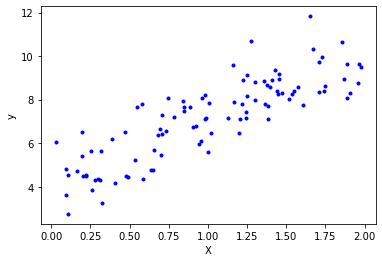

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "bo", markersize = 3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Now let's compute $\hat{\theta}$ using the normal equation. We will use the `inv()` function from numpy's linear algebra module (`np.linalg`) to compute the inverse of a matrix, & the `dot()` method for matrix multiplication.

In [33]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function we used to generate the data is $y = 4 + 3x + Gaussian\ noise$. Let's see what the equation found.

In [34]:
theta_best

array([[4.24584654],
       [2.90228764]])

We would have hoped for $\theta_0$ = 4 & $\theta_1$ = 3. Close enough though, but the noise made it impossible to recover the exact parameters of the original function.

Now you can make predictions using $\hat{\theta}$:

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.24584654],
       [10.05042181]])

Let's plot this model's prediction.

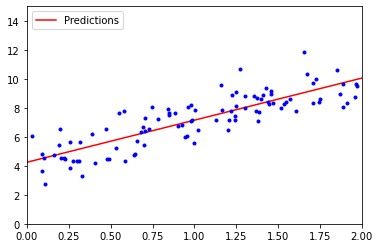

In [36]:
plt.plot(X_new, y_predict, "r-")
plt.legend(["Predictions"], loc = "upper left")
plt.plot(X, y, "bo", markersize = 3)
plt.axis([0, 2, 0, 15])
plt.show()

Performing linear regression using scikit-learn is quite simple.

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.24584654]), array([[2.90228764]]))

In [38]:
lin_reg.predict(X_new)

array([[ 4.24584654],
       [10.05042181]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you can call directly:

In [39]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.24584654],
       [2.90228764]])

This function computes $\hat{\theta} = X^{+}y$, where $X^{+}$ is the *pseudoinverse* of $X$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly.

In [40]:
np.linalg.pinv(X_b).dot(y)

array([[4.24584654],
       [2.90228764]])

The pseudoinverse itself is computed using a standard matrix factorisation technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U$ $\sum$ $V^{T}$. The pseudo inverse is computed as $X^{+} = V\sum^{+}U^{T}$. To compute the matrix $\sum^{+}$, the algorithm takes $\sum$ & sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse,& finally it transposes the resulting matrix. This approach is more efficient than computing the normal equation, plus it handles edge cases nicely: indeed, the normal equation may not work if the matrix $X^{T}X$ is not invertible(i.e., singular), such as *m* < *n* or if some features are redundant, but the pseudoinverse is always defined.

## Computational Complexity

The normal equation computes the inverse of $X^{T}X$, which is an $(n + 1)(n + 1)$ matrix (where *n* is the number of features). The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4} = 5.3$ to $2^3 = 8$.

The SVD approach used by scikit-learn's `LinearRegression` class is about $O(n^2)$. If you double the number of features, you multiply the computation time by roughly 4.

Also, once you have trained your linear regression model (using the normal equation or any other algorithm), predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on & the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

Now we will look at very different ways to train a linear regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

---

# Gradient Descent

*Gradient Descent* is a very generic optimisation algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimise a cost function.

Supose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient does; it measures the local gradient of the error function with regards to the parameter vector $\theta$, & it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start bu filling $\theta$ with random values (this is called *random initialisation), & then you improve it gradually, taking one, baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum.

<img src = "Images/Gradient Descent.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

An important parameter in gradient descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

<img src = "Images/Learning Rate.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

On the other hand, if the learning rate is too high, you might jump across the valley & end up on the other side, possibly even higher up than before. This might make the algorithm diverge, with larger & larger values, failling to find a good solution.

<img src = "Images/Learning Rate 1.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, & all sorts of irregular terrains, making convergence to the minimum very difficult. The below figure shows the two main challenges with gradient descent: if he random initialisation starts the algorithm on the left, then it will converge to a *local minimum*, which is not a good as the *global minimum*. If it starts on the right, then it will tak a very. long time to cross the plateau, & if you stop too early you will never reach the global minimum.

<img src = "Images/Gradient Descent Pitfalls.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Fortunately, the MSE cost function for a linear regression model happens to be a *convex function*,which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have great consequence: gradient descent is guaranteed to approach arbitrarily close to the global minimum (if you wait long enough & if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. The below figure shows gradient descent on a training set where features 1 & 2 have the same scale (on the left), & on a training set where feature 1 has much smaller values than feature 2 (on the right).

<img src = "Images/Gradient Descent 1.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

As you can see, on the left, the gradient descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right, it first goes in a direction almost orthogonal to the direction of the global minimum,& it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

This diagram also iilustrates the fact that training a model means searching for a combination of model parameters that minimises a cost function (over the training set). It is a search in the mode's *parameter space*: the more parameters a model has, the more dimensions htis space has,& the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost function is convex in the case of linear regression, the needle is simply at the bottom of the bowl.

## Batch Gradient Descent

To implement gradient descent, you need to compute the gradient of the cost function with regards to each model paramter $\theta_j$. In other words, you need to claculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a *partial derivative*. It is like asking "what is the slope of the mountain under my feet if I face east?" * then asking the same question facing north (& so on for the rest of the other dimensions, if you can imagine a universe with more than three dimensions). The below function computes the partial derivative of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial\theta_j}MSE(\theta)$.

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum^{m}_{i = 1}(\theta^{T}x^{(i)} - y^{(i)})x^{(i)}_j$$

Instead of computing these partial derivatives individually, you can use the below function to compute them all in one go. The gradient vector, noted $\triangledown_{\theta}MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).

$$\triangledown_{\theta}MSE(\theta) = \Bigg(\begin{split} 
{\frac{\partial}{\partial\theta_0} MSE(\theta)} \\
{\frac{\partial}{\partial\theta_1} MSE(\theta)} \\
{...} \\
{\frac{\partial}{\partial\theta_n}MSE(\theta)} 
\end{split}\Bigg) = \frac{2}{m}X^T(X\theta - y)$$

One you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\triangledown_{\theta} MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiple the gradient vector by $\eta$ to determine the size of the downhill step.

$$\theta^{(next\ step)} = \theta - \eta\triangledown_{\theta}MSE(\theta)$$

Let's look at a quick implementation of this algorithm.

In [41]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

That wasn't too hard! Sure was hard to understand though. Let's look at the resulting `theta`.

In [42]:
theta

array([[4.24584654],
       [2.90228764]])

Hey! That's exactly what the normal equation found! Gradient descent worked perfectly. But what if we had used a different learning rate `eta`?. The below figure shows the first 10 steps of gradient descent using three different learning rates (the dashed line represents the starting point).

<img src = "Images/Gradient Descent with Different Learning Rates.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place & actually getting further & further away from the solution at every step.

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrup the algorithm when the gradient vector becomes tiny -- that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the *tolerance*) -- because this happens when the gradient descent has (almost) reached the minimum).

## Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.At the opposite extreme, *stochastic gradient descent* just picks a random instance in the training set at every step & computes the gradients based only on that single instance. Obviously, this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm).

One the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up & down, decreasing only on average. Over time, it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

<img src = "Images/Stochastic Gradient Descent.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a chance of finding the global minimum than batch gradient descent does. 

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress & escape local minima), then get smaller & smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process of annealing in metallurgy where molten meta is slowly cooled down. The function that determines the learning rate at each iteration is called the *learning schedule*. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time & end up with a suboptimal solution if you halt training too early.

The following code implements stochastic gradient descent using a simple learning schedule.

In [43]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range (n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

By convention, we iterate by rounds of *m* iterations; each round is called an *epoch*. While the batch gradient descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times & reaches a fairly good solution.

In [44]:
theta

array([[4.26899635],
       [2.87439285]])

The following figure shows the first 20 steps of traianing (notice how irregular the steps are).

<img src = "Images/Stochastic Gradient Descent 1.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Note that since instances are picked randomly, some instances may be picked severaltimes per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features & the labels jointly), then go through it instance by instance, then shuffle it again, & so on. However, this generally converges more slowly.

To perform linear regression using SGD with scikit-learn, you can use the `SGDRegressor` class, which defaults to optimising the squared error cost function. The following code runs for maximum 1000 epochs (`max_iter = 1000`) or until the loss drops by less than 1e-3 during one epoch (`tol = 1e-3`), starting with a learning rate of 0.1 (`eta0 = 0.1`), using the default learning schedule (different from the preceding one), & it does not use any regularisation (`penalty = None`).

In [45]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

Once again, you find a solution quite close to the one retured by the noraml equation.

In [46]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24300814]), array([2.92031118]))

## Mini-batch Gradient Descent

The last gradient descent algorithm we will look at is called *mini-batch gradient descent*. It is quite simple to understand once you know batch & stochastic gradient descent: at each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random subsets of instances called *mini-batches*. The main advantage of mini-batch GD over stochastic GD is that you can get a performance boost from hardware optimisation of matrix operations, especially when using GPUs.

The algorithm's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escpae from local minima (in the case of problems that suffer from local minima, unlike linear regression as we saw earlier). The below figure shows the paths taken by the three gradient descent algorithms in parameter space during training. They all end up near the minimum, but batch GD's path actually stops at the minimum, while both stochastic GD & mini-batch GD continue to walk around. However, don't forget that batch GD takes a lot of time to take each step, & stochastic GD & mini-batch GD would also reach the minimum if you used a good learning schedule.

<img src = "Images/Compare Gradient Descent.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Let's compare the algorithm we've discussed so far for linear regression (recall that *m* is the number of training instances & *n* is the number of features).

In [47]:
import pandas as pd

algo_comp = {"Algorithm":["Normal Equation", "SVD", "Batch GD", "Stochastic GD", "Mini-batch GD"],
             "Large m": ["Fast", "Fast", "Slow", "Fast", "Fast"],
             "Out-of-Core Support": ["N", "N", "N", "Y", "Y"],
             "Large n": ["Slow", "Slow", "Fast", "Fast", "Fast"],
             "Hyperparams": ["0", "0", "2", ">= 2", ">= 2"],
             "Scaling Required": ["N", "N", "Y", "Y", "Y"],
             "Scikit-Learn": ["n/a", "LinearRegression", "SGDRegressor", "SGDRegressor", "SGDRegressor"]}
pd.DataFrame(algo_comp)

,Algorithm,Large m,Out-of-Core Support,Large n,Hyperparams,Scaling Required,Scikit-Learn
0,Normal Equation,Fast,N,Slow,0,N,n/a
1,SVD,Fast,N,Slow,0,N,LinearRegression
2,Batch GD,Slow,N,Fast,2,Y,SGDRegressor
3,Stochastic GD,Fast,Y,Fast,>= 2,Y,SGDRegressor
4,Mini-batch GD,Fast,Y,Fast,>= 2,Y,SGDRegressor


---

# Polynomial Regression

What if your data is actually more complex than a simple straight line. Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers to each feature as new features, then train a linear model on this extended set of features. This technique is called *polynomial regression*.

Let's look at an example. First, let's generate some nonlinear data, based on a simple *quadratic equation* (plus some noise).

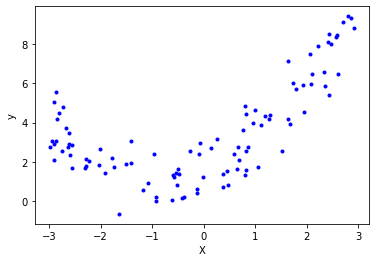

In [48]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "bo", markersize = 3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Clearly, a straight line will never fit this data properly. So let's use scikit-learn's `PolynomialFeatures` class to transform our training data, adding the square ($2^{nd}$-degree polynomial) of each feature in the training set as new features (in this case, there is just one feature).

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.06601708])

In [50]:
X_poly[0]

array([-0.06601708,  0.00435826])

`X_poly` now contains the original feature of X plus the square this feature. Now you can fit a `LinearRegression` model to this extended training data.

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.56541137]), array([[1.00630308, 0.58698328]]))

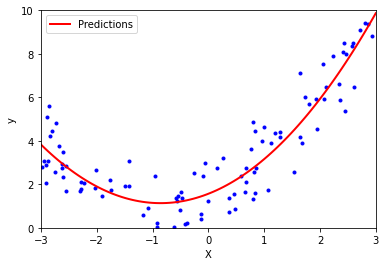

In [52]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "bo", markersize = 3)
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc = "upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

Not bad. The model estimates $\hat{y} = 0.48x^2 + 0.93x + 1.78$ when in fact the original function was $y = 0.5x^2 + x + 2 + Gaussian\ noise$.

Note that when there are multiple features, polynomial regression is capable of finding relationships between features (which is something a plain linear regression model cannot do). This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features *a* & *b*, `PolynomialFeatures` with `degree = 3` would not only add the features $a^2$, $a^3$, $b^2$ & $b^3$, but also the combinations $ab$, $a^2b$, & $ab^2$.

---

# Learning Curves

If you perform high-degree polynomial regression, you will likely fit the training data much better than with plain linear regression; for example, if we apply a 300-degree polynomial model to the preceding training data, & compare the result with a pure linear model & a quadratic model (2nd-degree polynomial). Notice how the 300-degree polynomial wiggles around to get as close as possible to the training instances.

<img src = "Images/Polynomial Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Of course, this high-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalise best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general, you won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In chapter 2, you used cross-validation to get an estimate of a model's generalisation performance. If a model performs well on the training data but generalises poorly according to the cross-validation metrics, when your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way is to look at the *learning curves*: these are plots of the model's performance on the training set & the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data.

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

Let's look at the learning curves of the plain linear regression model.

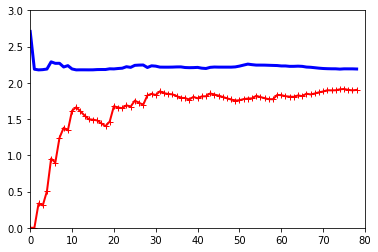

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

This deserves a bit of explanation. First, let's look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy & because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalising properly, which isi why the validation error is initially quite big. Then as the model is shown more training examples,it learns & thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close & fairly high.

Now let's look at the learning curves of a 10th-degree polynomial model on the same data.

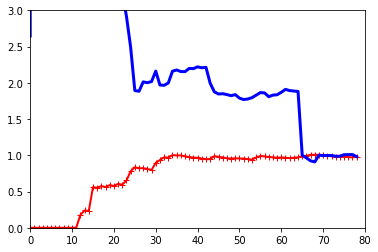

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree = 10, include_bias = False)), 
                                  ("lin_reg", LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

These learning curves look a bit like the previous ones, but there are two very important difference:

* The error on the training data is much lower than with the linear regression model.
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

---

# Regularised Linear Models

As we saw in previous chapters, a good way to reduce overfitting is to regularise the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularise a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularisation is typically achieved by constraining the weights of the model. We will now look at ridge regression, lasso regression, & elastic net, which implement three different ways to constrain the weights.

## Ridge Regression

*Ridge regression* is a regularised version of linear regression: a *regularisation term* equal to $\alpha\sum^{n}_{i = 1}\theta^2_i$ is added to the cost function. This forces the linear algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularisation term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularised performance measure.

The hyperparameter $\alpha$ controls how much you want to regularise the model. If $\alpha$ = 0, then ridge regression is just linear regression. If $\alpha$ is very alrge, then all weights end up very close to zero & the result is a flat line going through the data's mean. Here is the ridge regression cost function.

$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum^{n}_{i = 1}\theta^2_i$$

Note that the bias term $\theta_0$ is not regularised (the sum starts at i = 1, not 0). If we define $w$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularisation term is simply equal to $\frac{1}{2}(||w||_2)^2$ where $||w||_2$ represents the $l_2$ norm of the weight vector. For gradient descent, just add $\alpha w$ to the MSE gradient vector.

<img src = "Images/Ridge Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

The above figure shows several ridge regression models trained on some linear data using different $\alpha$ values. One the left, plain ridge models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree = 10`, then it is scaled using a `StandardScaler`, & final the ridge models are applied to the resulting features: this is polynomial regression with ridge regularisation. Note how increasing $\alpha$ leads to a flatter (i.e., less extreme, more reasonable) preddctions; this reduces the model's variance but increases its bias.

As with linear regression, we can perform ridge regression either by computing a closed-form equation or by performing gradient descent. The pros & cons are the same. The following function shows the closed-form solution (where $A$ is the $(n + 1)(n + 1)$ *identity matrix* except with a 0 in the top-left cell, corresponding to the bias term).

$$\hat{\theta} = (X^TX + \alpha A)^{-1}X^Ty$$

Here is how to perform ridge regression with scikit-learn using a closed-form solution.

In [56]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.70912199]])

& using stochastic gradient descent.

In [57]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.65785032])

The `penalty` hyperparameter sets the type of regularisation term to use. Specifying "`l2`" indicates that you want SGD to add a regularisation term to the cost function equal to half the square of the $l_2$ norm of the weight vector: this is simply ridge regression.

## Lasso Regression

*Least Absolute Shrinkage & Selection Operation Regression* (simply called *Lasso regression*) is another regularisation version of linear regression: just like ridge regression, it adds a regularisation term to the cost function, but it used the $l_1$ norm of the weight vector instead of half the square of teh $l_2$ norm.

$$J(\theta) = MSE(\theta) + \alpha\sum^{n}_{i = 1}|\theta_i|$$

The below figure shows several lasso regression models trained on some linear data using different $\alpha$ values.

<img src = "Images/Lasso Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

An important characteristic of Lasso regression is that it tends to completely eliminates the weights of the least important features (i.e, set them to zero). For example, the dashed line in the right plot (with $\alpha = 10^{-7}$) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso regression automatically performs feature selection & outputs a *sparse model* (i.e., with few nonzero feature weights).

<img src = "Images/Lasso vs Ridge Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

You can get a sense of why this is the case. one the top-left plot, the background contours (ellipses) represent an unregularised MSE cost function ($\alpha$ = 0), & the white circles show the batch gradient descent path with that cost function. The foreground contours (diamonds) represent the $l_1$ penalty, & the triange shows the BGD path for this penalty only ($\alpha \rightarrow \infty$). Notice how the path first reaches $\theta_1$ = 0, then rolls down the gutter until it reacher $\theta_2$ = 0. On the top-right plot, the contours represent the same cost function plus an $l_1$ penalty with $\alpha$ = 0.5. The global minimum is on the $\theta_2$ = 0 axis. BGD first reaches $\theta_2$ = 0, then rolls down the gutter until it reaches the global minimum. The two bottom plots show the same thing but uses an $l_2$ penalty instead. The regularised minimum is closer to $\theta$ = 0 than the unregularised minimum, but the weights do not get fully eliminated.

The Lasso cost function is not differentiable at $\theta_i$ = 0 (for i = 1, 2, ..., n), but gradient descent still works fine if you use a *subgradient vector* $g$ instead whenany $\theta_i$ = 0. Below shows a subgradient vector equation you can use for gradient descent with the Lasso cost function.

$$g(\theta, J) = \triangledown_{\theta}MSE(\theta) + \alpha \Bigg(\begin{split}
sign(\theta_1) \\
sign(\theta_2) \\
{\vdots} \\
sign(\theta_n)
\end{split} \Bigg) where\ sign(\theta_i) = \Biggl\{\begin{split}
-1\ if\ \theta_i < 0 \\
0\ if\ \theta_i = 0 \\
1\ if\ \theta_i > 0
\end{split}$$

Here is a small example using the `Lasso` class. Note that you could instead use an `SGDRegressor(penalty = "l1")`.

In [58]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.66533413])

## Elastic Net

Elastic net is a middle ground between ridge regression & lasso regression. The regularisation term is a simple mix of both ridge & lasso's regularisation terms, & you can control the mix ratio *r*. When *r* = 0, elastic net is equivalent to ridge regression, & when *r* = 1, it is equivalent to lasso regression.

$$J(\theta) = MSE(\theta) + r\alpha\sum^{n}_{i = 1}|\theta_i| + \frac{1 - r}{2}\alpha\sum^{n}_{i = 1}\theta^2_i$$

So when should you use plain linear regression (i.e., without any regularisation), ridge, lasso, & elastic net? It is almost always preferable to have at least a little bit of regularisation, so generally you should avoid plain linear regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer lasso or elastic net since they tend to reduce the useless features' weights down to zero as we have discussed. In general, elastic net is perferred over lasso since lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example using scikit-learn's `ElasticNet` (`l1_ratio` corrsponds to the mix ratio *r*):

In [59]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.67097706])

## Early Stopping

A very different way to regularise iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. The below figure shows a complex model (in this case a high-degree polynomial regression model) being trained using batch gradient descent. As the epochs go by, the algorithm learns & its prediction error (RMSE) on the training set naturally goes down, & so does it prediction error on the validation set. However, after a while, the validation error stops decreasing & actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping, you must stop training as soon as the validation error reaches the minimum. It is such a simple & efficeint regularisation technique that some call it "beautiful free lunch".

<img src = "Images/Early Stopping.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Here is a basic implementatino of early stopping.

In [64]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree = 90, include_bias = False)), 
                        ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
                     
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, 
                       penalty = None, learning_rate = "constant", eta0 = 0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        bestmodel = clone(sgd_reg)

Note that with `warm_start = True`, when the `fit()` method is called, it just continues training where it left off instead of restarting from scratch.

---

# Logistic Regression

As we discussed before, some regression algorithms can be used for classification as well (& vice versa). *Logistic regression* is common used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not (i.e., it belongs to the negative class, labeled "0"). This makes it a binary classifier.

## Estimating Probabilities

So how does it work? Just like a linear regression model, a logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the linear regression model does, it outputs the *logistic* of this result.

$$\hat{p} = h_{\theta}(x) = \sigma(x^T\theta)$$

The logistic -- noted $\sigma(.)$ -- is a *sigmoid funcrion* (i.e., S-shaped) that outputs a number between 0 & 1. It is defined as the following function.

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

<img src = "Images/Logistic Regression.png" alt = "Alternative text" width = "500" style = "margin:auto"/>

Once the logistic regression model has estimated the probability $\hat{p} = h_{\theta}(x)$ that an instance $x$ belongs to the positive class, it can make its predictions $\hat{y}$ easily.

$$\hat{y} = \Biggl\{ \begin{split}
0\ if\ \hat{p} < 0.5 \\
1\ if\ \hat{p} >= 0.5
\end{split}$$

Notice that $\sigma(t)$ < 0.5 when t < 0, & $\sigma(t)$ >= 0.5 when t >= 0, so a logistic regression predicts 1 if $x^T\theta$ is positive & 0 if it is negative.

## Training & Cost Function

Good, now you know how a logistic regression model estimates probabilities & makes predictions. But how is it trained? The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instance(y = 1) & low probabilities for negative instance (y = 0). This idea is captured by the cost function shown below, for a single training instance x.

$$c(\theta) = \Biggl\{ \begin{split}
-log(\hat{p})\ if\ y = 1 \\
-log(1 - \hat{p})\ if\ y = 0
\end{split}$$

This cost function makes sense because -log(t) grows very large when *t* approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, & it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, -log(t) is close to 0 when *t* is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called the *log loss*, demonstrated below.

$$J(\theta) = -\frac{1}{m}\sum^{m}_{i = 1}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]$$

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimises the cost function (there is no equivalent of the normal equation). But the good news is that this cost function is convex, so gradient descent (or any other optimisation algorithm) is guaranteed to find the gloabl minimum (if the learning rate is not too large & you wait long enough). The partial derivtives of the cost function with regards to the jth model paramter $\theta_j$ is given:

$$\frac{\partial}{\partial\theta_j} = \frac{1}{m}\sum^{m}_{i = 1}(\sigma(\theta^Tx^{(i)}) - y^{(i)})x^{(i)}_j$$

For each instance, the expression computes the prediction error & multiplies it by the jth feature value, & then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives you can use it in the batch gradient descent algorithm. That's it: you now know how to train a logistic regression model. For stochastic GD, you would of course take on instance at a time, & for mini-batch GD, you would use a mini-batch at a time.

## Decision Boundaries